# Line Histograms
2 graphs
difference vs. frequency

In [1]:
import csv
import math
from matplotlib import image
from matplotlib import pyplot as plt

In [2]:
def removeScorer_otherInfo(csv_file):
    # remove indeces 0-3
    data = csv_file[3:]
    imgNames = []
    for i in range(len(data)):
        imgNames.append(data[i][2])
        temp = data[i]
        temp = temp[3:]
        data[i] = temp
    return [data, imgNames]
#b1_c1_j = removeScorer_otherInfo(rows)

def openCSV_getData(file_csv):
    file = open(file_csv)
    type(file)
    csvreader = csv.reader(file)
    rows = []
    for row in csvreader:
        rows.append(row)
    temp = removeScorer_otherInfo(rows)
    data = temp[0]
    imgNames = temp[1]
    return data, imgNames

def correctImages(img):
    new = []
    numbs = []
    for i in range(len(img)):
        temp = 'frame' 
        t = img[i][3:7] 
        if t[0] == "0":
            t = t[1:]
        temp = temp + t + '.jpg'
        numbs.append(t)
        new.append(temp)
    return new, numbs

def distanceBetweenPoints(x1, y1, x2, y2):
    xDiff = abs(x2 - x1)
    yDiff = abs(y2 - y1)
    xDiff = xDiff**2
    yDiff = yDiff**2
    distance = xDiff + yDiff
    distance = math.pow(distance, 1/2)
    return distance


In [3]:
kreiman_csv = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Kreiman (1).csv"
jaeson_csv = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Jaeson_Block1Cam1.csv"

kreiman_1 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Kreiman (1).csv")
b1_k, img1_k = kreiman_1[0], kreiman_1[1]
kreiman_2 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Kreiman (2).csv")
b2_k, img2_k = kreiman_2[0], kreiman_2[1]
kreiman_3 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Kreiman (3).csv")
b3_k, img3_k = kreiman_3[0], kreiman_3[1]


jaeson_1 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Jaeson_Block1Cam1.csv")
b1_j, img1_j = jaeson_1[0], jaeson_1[1]
jaeson_2 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Jaeson_Block1Cam2.csv")
b2_j, img2_j = jaeson_2[0], jaeson_2[1]
jaeson_3 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Jaeson_Block1Cam3.csv")
b3_j, img3_j = jaeson_3[0], jaeson_3[1]

imgs, numbers = correctImages(img1_k)


In [4]:
import numpy as np

def calculateDistances(kreiman, jaeson):
    distances = []
    sumD = 0 
    count = 0
    for i in range(len(kreiman)):
        for d in range(6):
            k_x, k_y = 0, 0
            j_x, j_y = 0, 0
            if (kreiman[i][d*2]) != '' and (kreiman[i][d*2+1]) != '' and (jaeson[i][d*2]) != '' and (jaeson[i][d*2+1]) != '':
                k_x, k_y = float(kreiman[i][d*2]), float(kreiman[i][d*2+1])
                j_x, j_y = float(jaeson[i][d*2]), float(jaeson[i][d*2+1])
                count += 1
                
                distance = distanceBetweenPoints(k_x, k_y, j_x, j_y)
                sumD += distance
                distances.append(distance)
                
    print()
    print(count)
    print("standard deviation is", np.std(distances))
    print("average is", sumD / count)
    return distances

distances_cam1 = calculateDistances(b1_k, b1_j)
distances_cam2 = calculateDistances(b2_k, b2_j)
distances_cam3 = calculateDistances(b3_k, b3_j)
            


279
standard deviation is 14.021129768553736
average is 19.41051716101052

224
standard deviation is 10.511279875316532
average is 24.25371569395862

199
standard deviation is 28.305046927249133
average is 20.706179814778743


In [5]:
distances = distances_cam1 + distances_cam2 + distances_cam3
print(np.mean(distances))
print(np.std(distances))

21.323214225797198
18.568897572389663


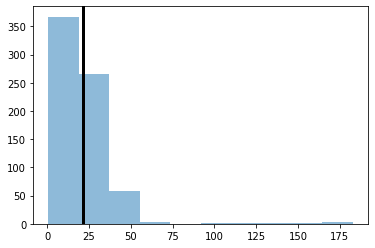

In [6]:
plt.hist(distances, alpha=0.5)
plt.axvline(np.mean(distances), color='black', linewidth=3)
#plt.xlabel('Difference in ' + xLabels[bodyPart] + " (pixels)", fontweight='bold', fontsize=13)
#plt.ylabel('Frequency', fontweight='bold', fontsize=13)
plt.show() 

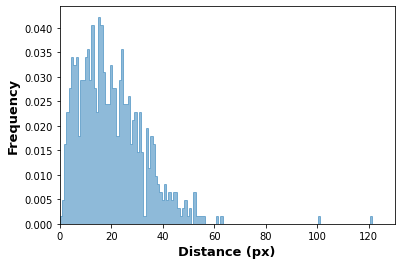

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

noise = np.random.normal(0, 1, (1000, ))
density = stats.gaussian_kde(distances)
n, x, _ = plt.hist(distances, bins=np.linspace(0, 175, 200), 
                   histtype=u'step', density=True, fill=True, alpha=0.5)  
#plt.plot(x, density(x))
#plt.plot(x=21.323214225797198)
#plt.axvline(np.mean(distances), ls='--', linewidth=1)
#ax.vlines(x=21.323214225797198, ymin=0, ymax=200, lw=1)
plt.xlabel("Distance (px)", fontweight ='bold', fontsize = 13)
plt.ylabel("Frequency", fontweight ='bold', fontsize = 13)
plt.xlim([0, 130])
#plt..text(0, 0.5, 'Ratio', va='center', rotation='vertical', fontweight ='bold', fontsize = 13)
#plt.savefig('fig2b_top.pdf', format='pdf')
plt.show()



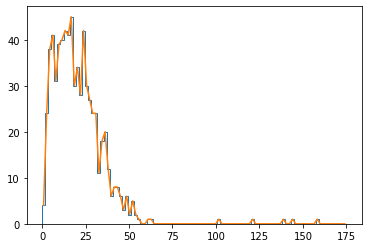

In [8]:

n,x,_ = plt.hist(distances, bins = np.linspace(0,175,100), histtype=u'step' )
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(fill=True)
plt.plot(bin_centers,n) 

plt.show()

In [9]:
import pandas as pd
>>> # Sample from two different normal distributions
>>> means = 10, 20
>>> stdevs = 4, 2
>>> dist = pd.DataFrame(
...     np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
...     columns=['a', 'b'])
>>> dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)
#           a      b
# min   -1.57  12.46
# max   25.32  26.44
# mean  10.12  19.94
# std    3.94   1.94

,a,b
min,-5.03,14.08
max,24.68,25.62
mean,10.05,20.07
std,4.10,2.00


Text(0, 0.5, 'Probability')

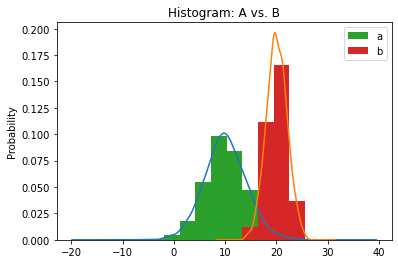

In [10]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
#ax.grid(axis='y')
#ax.set_facecolor('#d8dcd6')

<AxesSubplot:>

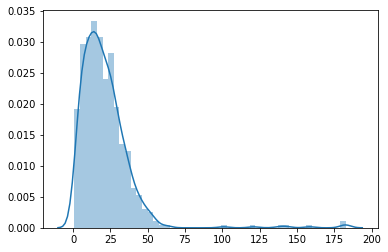

In [11]:
import seaborn as sns

#sns.set_style('darkgrid')
sns.distplot(distances)

<AxesSubplot:>

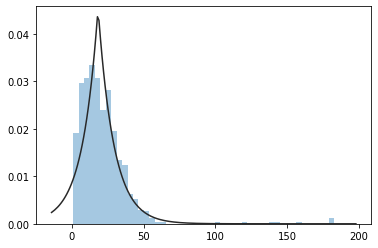

In [12]:
sns.distplot(distances, fit=stats.laplace, kde=False)

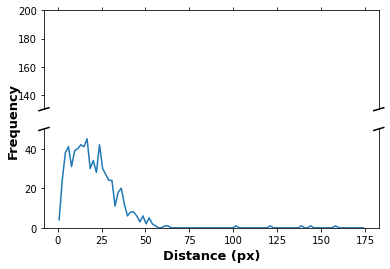

In [13]:
import matplotlib.pyplot as plt
import numpy as np


pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

pts = np.array(distances)
pts[[3, 14]] += .8

f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

ax.plot(bin_centers, n)
ax2.plot(bin_centers, n)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(130, 200)  # outliers only
ax2.set_ylim(0, 50)  # most of the data

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()



d = .015 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.xlabel("Distance (px)", fontweight ='bold', fontsize = 13)
#f.text("Frequency", fontweight ='bold', fontsize = 15)
f.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontweight ='bold', fontsize = 13)

plt.show()

In [14]:
tempDistances = []
for i in range(len(distances)):
    temp = distances[i] / 900
    tempDistances.append(temp)


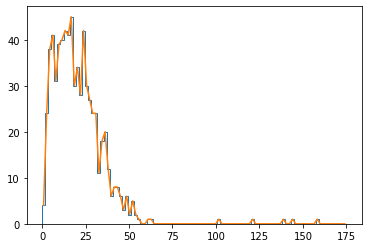

In [15]:
n,x,_ = plt.hist(distances, bins = np.linspace(0,175,100), histtype=u'step' )
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) 
plt.show()

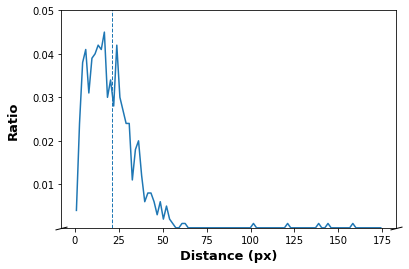

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# pts = np.array([
#     0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
#     0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
#     0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# pts = np.array(tempDistances)
# pts[[3, 14]] += .8

# f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 3]})

ax.plot(bin_centers, n)
# ax2.plot(bin_centers, n)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(0, 50)  # outliers only
#ax2.set_ylim(0, 60)  # most of the data

# ax.spines['bottom'].set_visible(False)
# #ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()
#ax2.set_yticks([0, 20, 40, 60], [0/900, "0.02", "0.04", "0.06"])
#ax2.set_yticks([0, 20, 40], [0/900, "0.02", "0.04"])

ax.set_yticks([10, 20, 30, 40, 50], [0.01, 0.02, 0.03, 0.04, 0.05])


# d = .015 
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)

# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes

# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
d = .25  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
#ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax.vlines(x=21.323214225797198, ymin=0, ymax=200, ls='--', lw=1)
#ax2.vlines(x=21.323214225797198, ymin=0, ymax=200, ls='--', lw=1)

plt.xlabel("Distance (px)", fontweight ='bold', fontsize = 13)
#f.text("Frequency", fontweight ='bold', fontsize = 15)
#f.text(0, 0.5, 'Ratio', va='center', rotation='vertical', fontweight ='bold', fontsize = 13)
fig.text(0, 0.5, 'Ratio', va='center', rotation='vertical', fontweight ='bold', fontsize = 13)

plt.show()

In [17]:
20/900

0.022222222222222223

# Calculating distances for each body part separately
import numpy as np

def calculateDistances_body(kreiman_1, jaeson_1, kreiman_2, jaeson_2, kreiman_3, jaeson_3, part):
    distances = []
    sumD = 0 
    for i in range(len(kreiman_1)):
        k_x_1, k_y_1 = 0, 0
        j_x_1, j_y_1 = 0, 0
        k_x_2, k_y_2 = 0, 0
        j_x_2, j_y_2 = 0, 0
        k_x_3, k_y_3 = 0, 0
        j_x_3, j_y_3 = 0, 0
        
        if (kreiman_1[i][part*2]) != '' and (kreiman_1[i][part*2+1]) != '' and (jaeson_1[i][part*2]) != '' and (jaeson_1[i][part*2+1]) != '':
            k_x_1, k_y_1 = float(kreiman_1[i][part*2]), float(kreiman_1[i][part*2+1])
            j_x_1, j_y_1 = float(jaeson_1[i][part*2]), float(jaeson_1[i][part*2+1])
            
        if (kreiman_2[i][part*2]) != '' and (kreiman_2[i][part*2+1]) != '' and (jaeson_2[i][part*2]) != '' and (jaeson_2[i][part*2+1]) != '':
            k_x_2, k_y_2 = float(kreiman_2[i][part*2]), float(kreiman_2[i][part*2+1])
            j_x_2, j_y_2 = float(jaeson_2[i][part*2]), float(jaeson_2[i][part*2+1])
            
        if (kreiman_3[i][part*2]) != '' and (kreiman_3[i][part*2+1]) != '' and (jaeson_3[i][part*2]) != '' and (jaeson_3[i][part*2+1]) != '':
            k_x_3, k_y_3 = float(kreiman_3[i][part*2]), float(kreiman_3[i][part*2+1])
            j_x_3, j_y_3 = float(jaeson_3[i][part*2]), float(jaeson_3[i][part*2+1])
                
        distance = distanceBetweenPoints(k_x_1, k_y_1, j_x_1, j_y_1)
        distance = distanceBetweenPoints(k_x_2, k_y_2, j_x_2, j_y_2)
        distance = distanceBetweenPoints(k_x_3, k_y_3, j_x_3, j_y_3)
        sumD += distance
        distances.append(distance)
    
    print()
    print("standard deviation is", np.std(distances))
    print("average is", sumD / (len(kreiman_1)*6))
    return distances

distances_leftfoot = calculateDistances_body(b1_k, b1_j, b2_k, b2_j, b3_k, b3_j, 0)
distances_leftknee = calculateDistances_body(b1_k, b1_j, b2_k, b2_j, b3_k, b3_j, 1)
distances_leftthigh = calculateDistances_body(b1_k, b1_j, b2_k, b2_j, b3_k, b3_j, 2)
distances_rightfoot = calculateDistances_body(b1_k, b1_j, b2_k, b2_j, b3_k, b3_j, 3)
distances_rightknee = calculateDistances_body(b1_k, b1_j, b2_k, b2_j, b3_k, b3_j, 4)
distances_rightthigh = calculateDistances_body(b1_k, b1_j, b2_k, b2_j, b3_k, b3_j, 5)

            

In [18]:
import numpy as np
distances_body_parts = [[], [], [], [], [], []]

def calculateDistances_body(kreiman, jaeson):
    #distances = []
    sumD = 0 
    for i in range(len(kreiman)):
        for d in range(6):
            k_x, k_y = 0, 0
            j_x, j_y = 0, 0
            if (kreiman[i][d*2]) != '' and (kreiman[i][d*2+1]) != '' and (jaeson[i][d*2]) != '' and (jaeson[i][d*2+1]) != '':
                k_x, k_y = float(kreiman[i][d*2]), float(kreiman[i][d*2+1])
                j_x, j_y = float(jaeson[i][d*2]), float(jaeson[i][d*2+1])
                
                distance = distanceBetweenPoints(k_x, k_y, j_x, j_y)
                sumD += distance
                distances_body_parts[d].append(distance)
    #print("standard deviation is", np.std(distances))
    #print("average is", sumD / (len(kreiman)*6))
    #return distances

calculateDistances_body(b1_k, b1_j)
calculateDistances_body(b2_k, b2_j)
calculateDistances_body(b3_k, b3_j)
        

In [19]:
for i in range(6):
    print(np.mean(distances_body_parts[i]))
    print(np.std(distances_body_parts[i]))
    print()

21.002658251259327
12.16815413686095

15.354634288789978
9.547466460746104

24.088107029529205
13.125067537824126

22.824152085355877
22.491139919851022

18.758291456008667
28.577827535865605

28.819796925183088
11.836028518965893



In [20]:
(19.882516477858825 + 12.590800116807781 + 14.292276837520658 + 
20.237414849015543 + 15.88202009942067 + 16.907614196107414) / 6

16.632107096121818

## Random

In [27]:
import random

def create_random():
    distances = []
    for i in range(50):
        for j in range(60):
            x_1 = random.randint(0, 880)
            x_2 = random.randint(0, 880)
            y_1 = random.randint(0, 620)
            y_2 = random.randint(0, 620)
            
            distance = distanceBetweenPoints(x_1, y_1, x_2, y_2)
            distances.append(distance)
    print("avg is", np.mean(distances))
    print("std is", np.std(distances))
    return distances
random_dist = create_random()

avg is 396.31361461903526
std is 192.75140086199502


In [28]:
import numpy as np
from scipy.stats import ranksums

In [31]:
ranksums(random_dist, distances)

RanksumsResult(statistic=40.941328552630445, pvalue=0.0)

# After 3/23/23 adding each part 

In [22]:
import numpy as np

def calculateDistances(arr, part):
    distances = []
    sumD = 0 
    
    for cam in range(3): 
        for i in range(len(arr[cam][0])):
            k_x, k_y = 0, 0
            j_x, j_y = 0, 0
            if (arr[cam][0][i][part*2]) != '' and (arr[cam][0][i][part*2+1]) != '' and (arr[cam][1][i][part*2]) != '' and (arr[cam][1][i][part*2+1]) != '':
                k_x, k_y = float(arr[cam][0][i][part*2]), float(arr[cam][0][i][part*2+1])
                j_x, j_y = float(arr[cam][1][i][part*2]), float(arr[cam][1][i][part*2+1])
                
                distance = distanceBetweenPoints(k_x, k_y, j_x, j_y)
                sumD += distance
                distances.append(distance)
            
    print("standard deviation is", np.std(distances))
    print("average is", np.mean(distances))
    print()
    return distances

distances_lf = calculateDistances([[b1_k, b1_j], [b2_k, b2_j], [b3_k, b3_j]], 0)
distances_lk = calculateDistances([[b1_k, b1_j], [b2_k, b2_j], [b3_k, b3_j]], 1)
distances_lt = calculateDistances([[b1_k, b1_j], [b2_k, b2_j], [b3_k, b3_j]], 2)
distances_rf = calculateDistances([[b1_k, b1_j], [b2_k, b2_j], [b3_k, b3_j]], 3)
distances_rk = calculateDistances([[b1_k, b1_j], [b2_k, b2_j], [b3_k, b3_j]], 4)
distances_rt = calculateDistances([[b1_k, b1_j], [b2_k, b2_j], [b3_k, b3_j]], 5)
            

standard deviation is 12.16815413686095
average is 21.002658251259327

standard deviation is 9.547466460746104
average is 15.354634288789978

standard deviation is 13.125067537824126
average is 24.088107029529205

standard deviation is 22.491139919851022
average is 22.824152085355877

standard deviation is 28.577827535865605
average is 18.758291456008667

standard deviation is 11.836028518965893
average is 28.819796925183088



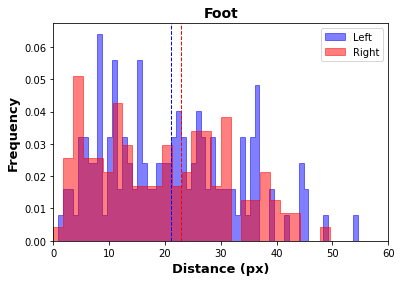

In [23]:
density = stats.gaussian_kde(distances_lf)
    
plt.hist(distances_lf, bins = np.linspace(0,175,200), histtype=u'step', 
                       color="blue", density=True, fill=f, alpha=0.5, label="Left")


plt.hist(distances_rf, bins = np.linspace(0,175,100), histtype=u'step', 
                       color="red", density=True, fill=f, alpha=0.5, label="Right")
plt.axvline(np.mean(distances_lf), color="blue", ls='--', linewidth=1)
plt.axvline(np.mean(distances_rf), color="red", ls='--', linewidth=1)


plt.xlabel("Distance (px)", fontweight ='bold', fontsize = 13)
plt.ylabel("Frequency", fontweight ='bold', fontsize = 13)
plt.xlim([0, 60])
plt.title("Foot", fontweight ='bold', fontsize = 14)
plt.legend(["Left", "Right"])
plt.savefig('/Users/betinakreiman/Desktop/figs/fig2b_foot.pdf', format='pdf')
plt.show()

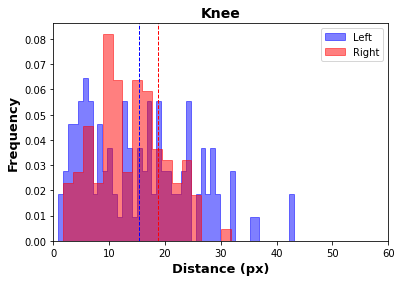

In [24]:
density = stats.gaussian_kde(distances_lk)
    
plt.hist(distances_lk, bins = np.linspace(0,175,200), histtype=u'step', 
                       color="blue", density=True, fill=f, alpha=0.5)

plt.hist(distances_rk, bins = np.linspace(0,175,100), histtype=u'step', 
                       color="red", density=True, fill=f, alpha=0.5)

plt.axvline(np.mean(distances_lk), color="blue", ls='--', linewidth=1)
plt.axvline(np.mean(distances_rk), color="red", ls='--', linewidth=1)


plt.xlabel("Distance (px)", fontweight ='bold', fontsize = 13)
plt.ylabel("Frequency", fontweight ='bold', fontsize = 13)
plt.xlim([0, 60])
plt.title("Knee", fontweight ='bold', fontsize = 14)
plt.legend(["Left", "Right"])
plt.savefig('/Users/betinakreiman/Desktop/figs/fig2b_knee.pdf', format='pdf')
plt.show()

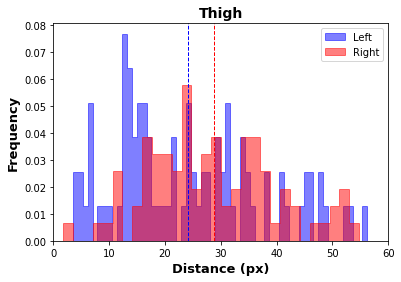

In [25]:
density = stats.gaussian_kde(distances_lt)
    
plt.hist(distances_lt, bins = np.linspace(0,175,200), histtype=u'step', 
                       color="blue", density=True, fill=f, alpha=0.5)

plt.hist(distances_rt, bins = np.linspace(0,175,100), histtype=u'step', 
                       color="red", density=True, fill=f, alpha=0.5)

plt.axvline(np.mean(distances_lt), color="blue", ls='--', linewidth=1)
plt.axvline(np.mean(distances_rt), color="red", ls='--', linewidth=1)


plt.xlabel("Distance (px)", fontweight ='bold', fontsize = 13)
plt.ylabel("Frequency", fontweight ='bold', fontsize = 13)
plt.xlim([0, 60])
plt.title("Thigh", fontweight ='bold', fontsize = 14)
plt.legend(["Left", "Right"])
plt.savefig('/Users/betinakreiman/Desktop/figs/fig2b_thigh.pdf', format='pdf')
plt.show()

## Creating Bar Graph

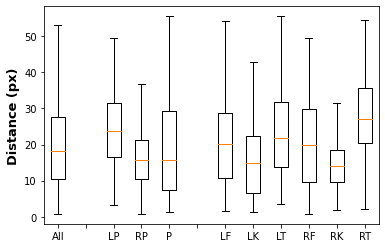

In [26]:
# distnaces, distances_cam1, distances_cam2, distances_cam3, 
# distances_lf, distances_lk, distances_lt
# distances_rf, distances_rk, distances_rt

fig, ax = plt.subplots()

data = [distances, [], distances_cam2, distances_cam3, distances_cam1, [], distances_lf, distances_lk, distances_lt,
       distances_rf, distances_rk, distances_rt]

xtick = ["All", "", "LP", "RP", "P", "", "LF", "LK", "LT", "RF", "RK", "RT"]
ax.boxplot(data, showfliers=False)
ax.set_xticklabels(xtick)
ax.set_ylabel("Distance (px)", fontweight ='bold', fontsize = 13)
plt.savefig('/Users/betinakreiman/Desktop/figs/fig2c.pdf', format='pdf')
